### Replication : Long Digital ATM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from configuration import ConfigurationBuilder
from pricing import BlackScholesMerton, GeometricBrownianMotion

In [2]:
configuration = ConfigurationBuilder(
    kind='call',
    spot=100.0,
    sigma=0.05,
    maturity=365,
    risk_free_rate=0,
    dividend_yield=0,
)

#### With Black Scholes Merton

In [3]:
shift = 1

configuration.strike = configuration.spot - shift
option_1 = BlackScholesMerton(configuration)

configuration.strike = configuration.spot 
option_2 = BlackScholesMerton(configuration)

In [4]:
digital = option_1 - option_2

In [5]:
print('price', abs(digital.price()))
print('delta', digital.delta())
print('gamma', digital.gamma())
print('vega', digital.vega())
print('theta', digital.theta())
print('rho', digital.rho())

price 0.529975495709202
delta 0.07942938379371178
gamma -0.0019870271517565957
vega -0.009935135758782965
theta 6.804887506015695e-05
rho 0.07412962883661978


#### With Geometric Brownian Motion

In [6]:
configuration.strike = configuration.spot
configuration.simulation = 10000
configuration.steps = 365
gbm_pricing = GeometricBrownianMotion(configuration)
gbm_pricing.run_simulation()

In [7]:
gbm_pricing.digital()

0.4893

### Sensitivity : Long Digital

In [29]:
init_spot = 100

data = []

for maturity, sigma in ((365, 0.2), (365, 0.05), (120, 0.20)):
    for spot in range(10, 190):
        
        # Configuration ---------------------------
        
        configuration.maturity = maturity
        configuration.sigma = sigma
        configuration.spot = spot

        # Option Strip ----------------------------

        configuration.strike = init_spot - shift
        option_1 = BlackScholesMerton(configuration)

        configuration.strike = init_spot
        option_2 = BlackScholesMerton(configuration)

        digital = option_1 - option_2

        # Retrieve Result ---------------------------

        data.append({"spot": spot,
                     "maturity": maturity,
                     "sigma": sigma,
                     "price": digital.price(),
                     "delta": digital.delta(),
                     "gamma": digital.gamma(),
                     "vega": digital.vega(),
                     "theta": digital.theta(),
                     "rho": digital.rho()})

# Reshape data ----------------------------------------

data = pd.DataFrame(data)
reference = data[(data["maturity"]==365) & (data["sigma"]==0.2)].set_index("spot")
short_sigma = data[(data["maturity"]==365) & (data["sigma"]==0.05)].set_index("spot")
short_maturity = data[(data["maturity"]==120) & (data["sigma"]==0.20)].set_index("spot")

In [35]:
price = pd.DataFrame()
price["sigma @ 20 maturity @ 365"] = reference["price"]
price["sigma @ 5 maturity @ 365"] = short_sigma["price"]
price["sigma @ 20 maturity @ 120"] = short_maturity["price"]

delta = pd.DataFrame()
delta["sigma @ 20 maturity @ 365"] = reference["delta"]
delta["sigma @ 5 maturity @ 365"] = short_sigma["delta"]
delta["sigma @ 20 maturity @ 120"] = short_maturity["delta"]

gamma = pd.DataFrame()
gamma["sigma @ 20 maturity @ 365"] = reference["gamma"]
gamma["sigma @ 5 maturity @ 365"] = short_sigma["gamma"]
gamma["sigma @ 20 maturity @ 120"] = short_maturity["gamma"]

vega = pd.DataFrame()
vega["sigma @ 20 maturity @ 365"] = reference["vega"]
vega["sigma @ 5 maturity @ 365"] = short_sigma["vega"]
vega["sigma @ 20 maturity @ 120"] = short_maturity["vega"]

theta = pd.DataFrame()
theta["sigma @ 20 maturity @ 365"] = reference["theta"]
theta["sigma @ 5 maturity @ 365"] = short_sigma["theta"]
theta["sigma @ 20 maturity @ 120"] = short_maturity["theta"]

rho = pd.DataFrame()
rho["sigma @ 20 maturity @ 365"] = reference["rho"]
rho["sigma @ 5 maturity @ 365"] = short_sigma["rho"]
rho["sigma @ 20 maturity @ 120"] = short_maturity["rho"]

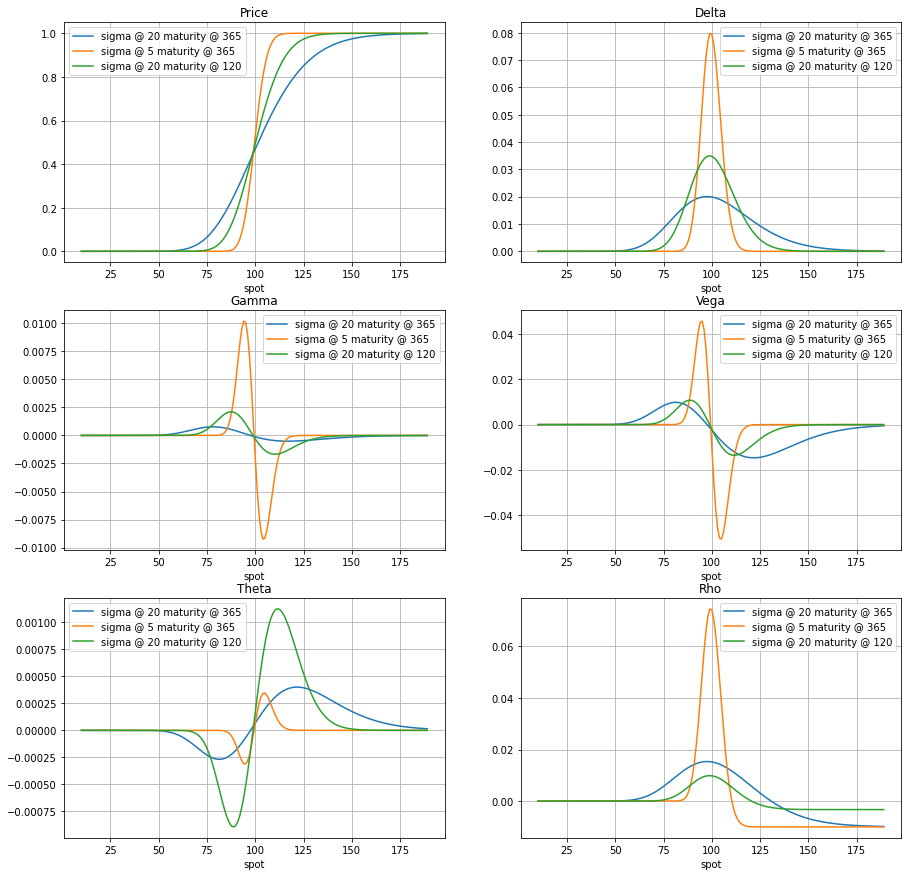

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=2)

price.plot(ax=axes[0, 0], title='Price', grid=True, legend=True)

delta.plot(ax=axes[0, 1], title='Delta', grid=True, legend=True)

gamma.plot(ax=axes[1, 0], title='Gamma', grid=True, legend=True)

vega.plot(ax=axes[1, 1], title='Vega', grid=True, legend=True)

theta.plot(ax=axes[2, 0], title='Theta', grid=True, legend=True)

rho.plot(ax=axes[2, 1], title='Rho', grid=True, legend=True)

fig.set_figheight(15)
fig.set_figwidth(15);